In [1]:
%reset

In [2]:
import multiprocessing
import numpy as np
from heterogeneous_spatial_networks_funcs import filepath_str, filename_str

In [3]:
# This may or may not correspond to the number of cpus for optimal
# parallelization performance. Feel free to modify if you see fit.
cpu_num = int(np.floor(multiprocessing.cpu_count()/2))

# Initialization of identification information for this particular batch
# of spider web-inspired Delaunay-triangulated networks
date = "20240812"
batch = "A"
network = "auelp"
scheme = "rccs"

date_str = f"date_{date}"
batch_str = f"batch_{batch}"
network_str = f"network_{network}"
scheme_str = f"scheme_{scheme}"

dim_str = "dim"
b_str = "b"
xi_str = "xi"
rho_nu_str = "rho_nu"
k_str = "k"
n_str = "n"
nu_str = "nu"
config_str = "config"

filepath = filepath_str(network)
filename_prefix = filepath + f"{date}{batch}"

identifier_filename = filename_prefix + "-identifier" + ".txt"
dim_filename = filename_prefix + f"-{dim_str}" + ".dat"
b_filename = filename_prefix + f"-{b_str}" + ".dat"
xi_filename = filename_prefix + f"-{xi_str}" + ".dat"
rho_nu_filename = filename_prefix + f"-{rho_nu_str}" + ".dat"
k_filename = filename_prefix + f"-{k_str}" + ".dat"
n_filename = filename_prefix + f"-{n_str}" + ".dat"
nu_filename = filename_prefix + f"-{nu_str}" + ".dat"
config_filename = filename_prefix + f"-{config_str}" + ".dat"
params_filename = filename_prefix + "-params" + ".dat"
sample_params_filename = filename_prefix + "-sample_params" + ".dat"
sample_config_params_filename = (
    filename_prefix + "-sample_config_params" + ".dat"
)

identifier_arr = np.asarray(
    [date_str, batch_str, network_str, scheme_str, dim_str, b_str, xi_str,
     rho_nu_str, k_str, n_str, nu_str])

# Initialization of fundamental parameters for polydisperse artificial
# end-linked polymer networks
dim_arr = np.asarray([2], dtype=int) # np.asarray([2, 3], dtype=int)
b_arr = np.asarray([1.0])
xi_arr = np.asarray([0.98])
rho_nu_arr = np.asarray([0.85])
k_arr = np.asarray([4], dtype=int) # np.arange(3, 9, dtype=int) # 3, 4, 5, 6, 7, 8
n_arr = np.asarray([150], dtype=int) # np.asarray([100, 150, 224, 334, 500, 748, 1118, 1672, 2500], dtype=int) # = np.rint(np.logspace(np.log10(100), np.log10(2500), num=9)).astype(int)
nu_arr = np.asarray([25], dtype=int) # np.asarray([5, 25, 125, 525], dtype=int)
config_arr = np.asarray([0], dtype=int) # 0 # np.arange(5, dtype=int) # 0, 1, 2, 3, 4

dim_num = np.shape(dim_arr)[0]
b_num = np.shape(b_arr)[0]
xi_num = np.shape(xi_arr)[0]
rho_nu_num = np.shape(rho_nu_arr)[0]
k_num = np.shape(k_arr)[0]
n_num = np.shape(n_arr)[0]
nu_num = np.shape(nu_arr)[0]
config_num = np.shape(config_arr)[0]

sample_num = dim_num * b_num * xi_num * rho_nu_num * k_num * n_num * nu_num
sample_config_num = sample_num * config_num

# Populate the network parameters array
params_arr = np.empty([sample_num, 7])
sample = 0
for dim in np.nditer(dim_arr):
    for b in np.nditer(b_arr):
        for xi in np.nditer(xi_arr):
            for rho_nu in np.nditer(rho_nu_arr):
                for k in np.nditer(k_arr):
                    for n in np.nditer(n_arr):
                        for nu in np.nditer(nu_arr):        
                            params_arr[sample, :] = (
                                np.asarray([dim, b, xi, rho_nu, k, n, nu])
                            )
                            sample += 1

# Populate the network sample parameters array
sample_params_arr = np.empty([sample_num, 8])
sample = 0
for dim in np.nditer(dim_arr):
    for b in np.nditer(b_arr):
        for xi in np.nditer(xi_arr):
            for rho_nu in np.nditer(rho_nu_arr):
                for k in np.nditer(k_arr):
                    for n in np.nditer(n_arr):
                        for nu in np.nditer(nu_arr):
                            sample_params_arr[sample, :] = (
                                np.asarray([sample, dim, b, xi, rho_nu, k, n, nu])
                            )
                            sample += 1

# Populate the network sample configuration parameters array
sample_config_params_arr = np.empty([sample_config_num, 9])
sample = 0
indx = 0
for dim in np.nditer(dim_arr):
    for b in np.nditer(b_arr):
        for xi in np.nditer(xi_arr):
            for rho_nu in np.nditer(rho_nu_arr):
                for k in np.nditer(k_arr):
                    for n in np.nditer(n_arr):
                        for nu in np.nditer(nu_arr):
                            for config in np.nditer(config_arr):
                                sample_config_params_arr[indx, :] = (
                                    np.asarray([sample, dim, b, xi, rho_nu, k, n, nu, config])
                                )
                                indx += 1
                            sample += 1

# Save identification information and fundamental network parameters
np.savetxt(identifier_filename, identifier_arr, fmt="%s")
np.savetxt(dim_filename, dim_arr, fmt="%d")
np.savetxt(b_filename, b_arr)
np.savetxt(xi_filename, xi_arr)
np.savetxt(rho_nu_filename, rho_nu_arr)
np.savetxt(k_filename, k_arr, fmt="%d")
np.savetxt(n_filename, n_arr, fmt="%d")
np.savetxt(nu_filename, nu_arr, fmt="%d")
np.savetxt(config_filename, config_arr, fmt="%d")
np.savetxt(params_filename, params_arr)
np.savetxt(sample_params_filename, sample_params_arr)
np.savetxt(sample_config_params_filename, sample_config_params_arr)

sample = 0

In [4]:
# Calculate and save L for the auelp parameter sample -- properly functionalize and parallelize this in the near future
from heterogeneous_spatial_networks_funcs import m_arg_stoich_func, n_nu_arg_m_func, L_arg_rho_func

# Generate filename
L_filename = filename_str(network, date, batch, sample) + "-L" + ".dat"

# Calculate L
dim = dim_arr[0]
rho_nu = rho_nu_arr[0]
k = k_arr[0]
n = n_arr[0]
nu = nu_arr[0]
m = m_arg_stoich_func(n, k)
n_nu = n_nu_arg_m_func(m, nu)
L = L_arg_rho_func(dim, n_nu, rho_nu)

# Save L
np.savetxt(L_filename, [L])

In [5]:
# Perform the random cross-linker seeding procedure for the auelp parameter sample -- properly functionalize and parallelize this in the near future\
from heterogeneous_spatial_networks_funcs import crosslinker_seeding

max_try = 100

dim = dim_arr[0]
b = b_arr[0]
n = n_arr[0]
config = config_arr[0]

crosslinker_seeding(network, date, batch, sample, scheme, dim, b, n, config, max_try)

In [6]:
# Check to see if the number of cross-linkers seeded in the random
# cross-linker procedure, rccs_n, equals the intended/specified number
# of cross-linkers to be seeded, n. Continue to the topology
# initialization procedure ONLY IF rccs_n = n. If rccs_n != n for any
# specified network, then the code block identifies which particular
# set(s) of network parameters rccs_n != n occurred for.
rccs_filename = (
    filename_str(network, date, batch, sample)
    + f"C{config:d}" + ".config"
)
rccs = np.loadtxt(rccs_filename)

if np.shape(rccs)[0] == n:
    print_str = (
        "Success! rccs_n = n from the random core cross-linker seeding "
        + "procedure for all network parameters!"
    )
    print(print_str)
else: 
    print_str = (
        "rccs_n != n from the random core cross-linker seeding "
        + "procedure for at least one set of network parameters. "
        + "Repeat the random core cross-linker seeding procedure "
        + "for the applicable set of network parameters before "
        + "continuing on to the topology initialization procedure."
    )
    print(print_str)

Success! rccs_n = n from the random core cross-linker seeding procedure for all network parameters!


In [7]:
# Testbed for the auelp_dim_2_simple_network_topology_initialization
# Args:
# L (float): Simulation box size of the core cross-linkers.
# core_x (np.ndarray): x-coordinates of the core cross-linkers.
# core_y (np.ndarray): y-coordinates of the core cross-linkers.
# b (float): Chain segment and/or cross-linker diameter.
# xi (float): Chain-to-cross-link connection probability
# n (float): Number of core cross-linkers.
# m (float): Number of chains.
# nu (float): Number of segments in each chain.
# k (int): Maximum cross-linker degree/functionality.
# max_try (int): 
# filename (str): Baseline filename for data files.

# Precalculation that should happen before calling the function
from heterogeneous_spatial_networks_funcs import m_arg_stoich_func

# Generate filename
filename = filename_str(network, date, batch, sample)
L_filename = filename + "-L" + ".dat"

# Load L
L = np.loadtxt(L_filename)

# Append configuration number to filename
filename = filename + f"C{config:d}"

# Generate config filename
config_filename = filename + ".config"

# Load core cross-linker coordinates
rccs = np.loadtxt(config_filename)
# Actual number of core cross-linkers
n = np.shape(rccs)[0] # rccs_n = np.shape(rccs)[0]
# Separate x- and y-coordinates of core cross-linkers
core_x = rccs[:, 0].copy() # rccs_x = rccs[:, 0].copy()
core_y = rccs[:, 1].copy() # rccs_y = rccs[:, 1].copy()

b = b_arr[0]
xi = xi_arr[0]
k = k_arr[0]
nu = nu_arr[0]
m = m_arg_stoich_func(n, k)

In [8]:
# In the actual function, apply an int(np.floor()) to various parameters, as a fail-safe check
n = int(np.floor(n))
m = int(np.floor(m))
nu = int(np.floor(nu))
k = int(np.floor(k))
max_try = int(np.floor(max_try))

In [9]:
# Determine r_nghbrhd
r_nghbrhd = 0.
r_mic = L / 2.
l_cntr = nu * b

if l_cntr > r_mic:
    r_nghbrhd = r_mic
else:
    r_nghbrhd = l_cntr

In [10]:
# # Brief aside: plot the Gaussian distribution
# from heterogeneous_spatial_networks_funcs import p_gaussian_cnfrmtn_func
# import matplotlib.pyplot as plt

# r_arr = np.linspace(0, l_cntr, 101)
# p_cnfrmtn_arr = p_gaussian_cnfrmtn_func(b, nu, r_arr)

# fig = plt.figure()
# plt.plot(r_arr, p_cnfrmtn_arr, "*-")
# plt.show()

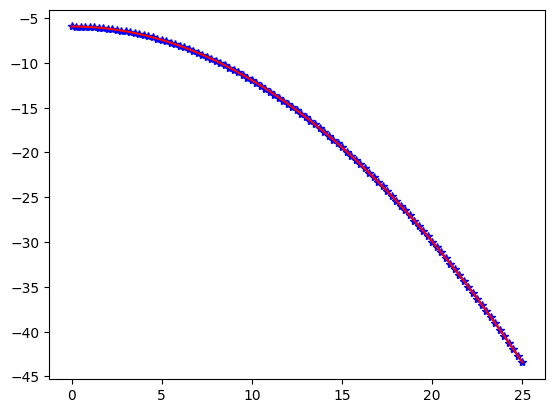

In [11]:
# Calculate the relative polymer chain conformation probability density via protocol from Hanson

from heterogeneous_spatial_networks_funcs import p_gaussian_cnfrmtn_func, ln_p_cnfrmtn_cubic_poly_fit_func
from scipy import optimize
import matplotlib.pyplot as plt

# Be careful with exactly how the binning -- or bin placement -- is defined
r_arr = np.linspace(0, r_nghbrhd, 101)

p_cnfrmtn_arr = p_gaussian_cnfrmtn_func(b, nu, r_arr)
ln_p_cnfrmtn_arr = np.log(p_cnfrmtn_arr) # natural log

popt, pconv = optimize.curve_fit(ln_p_cnfrmtn_cubic_poly_fit_func, r_arr, ln_p_cnfrmtn_arr)

ln_p_cnfrmtn_cubic_poly_fit_arr = ln_p_cnfrmtn_cubic_poly_fit_func(r_arr, *popt)

fig = plt.figure()
plt.plot(r_arr, ln_p_cnfrmtn_arr, "*-", color="blue")
plt.plot(r_arr, ln_p_cnfrmtn_cubic_poly_fit_arr, "-", color="red")
plt.show()

In [12]:
r_dnglng_chns = np.linspace(0, r_nghbrhd, 1001)
# Calculate and normalize weighting factors
w_dnglng_chns = np.exp(
    ln_p_cnfrmtn_cubic_poly_fit_func(r_dnglng_chns, *popt))
w_dnglng_chns = w_dnglng_chns / np.sum(w_dnglng_chns, dtype=float)

In [13]:
# Tessellate cross-linkers

from heterogeneous_spatial_networks_funcs import tessellation_protocol, dim_2_tessellation

# Copy the core_x and core_y np.ndarrays as the first n entries in
# the tessellated cross-linker x- and y-coordinate np.ndarrays
tsslltd_core_x = core_x.copy()
tsslltd_core_y = core_y.copy()

# Two-dimensional tessellation protocol
dim_2_tsslltn, dim_2_tsslltn_num = tessellation_protocol(2)
    
# Use two-dimensional tessellation protocol to tessellate the core
# cross-linkers
for tsslltn in range(dim_2_tsslltn_num):
    x_tsslltn = dim_2_tsslltn[tsslltn, 0]
    y_tsslltn = dim_2_tsslltn[tsslltn, 1]
    # Skip the (hold, hold) tessellation call because the core
    # cross-linkers are being tessellated about themselves
    if (x_tsslltn == 0) and (y_tsslltn == 0): continue
    else:
        # x- and y-coordinates from two-dimensional tessellation
        # protocol
        core_tsslltn_x, core_tsslltn_y = (
            dim_2_tessellation(L, core_x, core_y, x_tsslltn, y_tsslltn)
        )
        # Concatenate the tessellated x- and y-coordinates
        tsslltd_core_x = np.concatenate((tsslltd_core_x, core_tsslltn_x))
        tsslltd_core_y = np.concatenate((tsslltd_core_y, core_tsslltn_y))

del core_tsslltn_x, core_tsslltn_y

# Identify core nodes as cross-linkers
core_node_type = np.ones(n, dtype=int)

# Core cross-linker nodes
core_nodes = np.arange(n, dtype=int)

# Construct the pb2core_nodes np.ndarray such that
# pb2core_nodes[core_pb_node] = core_node
pb2core_nodes = np.tile(core_nodes, dim_2_tsslltn_num)

In [14]:
# Extract sampling neighborhoods for each core cross-linker

from heterogeneous_spatial_networks_funcs import core2pb_nodes_func

# Initialize sampling neighborhood list
core_nodes_nghbrhd = []
r_core_nodes_nghbrhd = []

for core_node in np.nditer(core_nodes):
    core_node = int(core_node)
    core_node_x = tsslltd_core_x[core_node]
    core_node_y = tsslltd_core_y[core_node]
    core_node_pstn = np.asarray(
        [
            core_node_x,
            core_node_y
        ]
    )

    # Downselect the local square neighborhood that is \pm r_nghbrhd
    # about the core node. Start by gathering the tessellated
    # cross-linker nodes that meet this criterion in each separate
    # coordinate.
    lcl_nghbr_x_lb = core_node_x - r_nghbrhd
    lcl_nghbr_x_ub = core_node_x + r_nghbrhd
    lcl_nghbr_y_lb = core_node_y - r_nghbrhd
    lcl_nghbr_y_ub = core_node_y + r_nghbrhd
    psbl_lcl_nghbr_x_nodes = (
        np.where(np.logical_and(tsslltd_core_x>=lcl_nghbr_x_lb, tsslltd_core_x<=lcl_nghbr_x_ub))[0]
    )
    psbl_lcl_nghbr_y_nodes = (
        np.where(np.logical_and(tsslltd_core_y>=lcl_nghbr_y_lb, tsslltd_core_y<=lcl_nghbr_y_ub))[0]
    )
    # Gather the nodes from each separate coordinate together to
    # assess all possible local cross-linker neighbors
    psbl_lcl_nghbr_nodes = np.concatenate(
        (psbl_lcl_nghbr_x_nodes, psbl_lcl_nghbr_y_nodes), dtype=int)
    # Retain unique possible local cross-linker neighbor nodes, and the
    # number of times each such node appears
    psbl_lcl_nghbr_nodes, psbl_lcl_nghbr_nodes_counts = (
        np.unique(psbl_lcl_nghbr_nodes, return_counts=True)
    )
    # The true local cross-linker neighbor nodes are those who appear
    # twice in the possible cross-linker neighbor node array -- equal to
    # the network dimensionality
    lcl_nghbr_nodes_indcs = np.where(psbl_lcl_nghbr_nodes_counts == 2)[0]
    lcl_nghbr_node_num = np.shape(lcl_nghbr_nodes_indcs)[0]
    # Further downselect to the neighborhood of tessellated
    # cross-linker nodes that are a distance of r_nghbrhd away from the
    # core node
    if lcl_nghbr_node_num > 0:
        # Gather the indices of the local cross-linker neighbors
        lcl_nghbr_nodes = psbl_lcl_nghbr_nodes[lcl_nghbr_nodes_indcs]
        # Extract local cross-linker neighbor coordinates
        lcl_nghbr_x = tsslltd_core_x[lcl_nghbr_nodes]
        lcl_nghbr_y = tsslltd_core_y[lcl_nghbr_nodes]
        # Calculate the distance between the core node and the local
        # cross-linker neighbor nodes
        r_lcl_nghbr_nodes = np.empty(lcl_nghbr_node_num)
        for lcl_nghbr_node_indx in range(lcl_nghbr_node_num):
            lcl_nghbr_pstn = np.asarray(
                [
                    lcl_nghbr_x[lcl_nghbr_node_indx],
                    lcl_nghbr_y[lcl_nghbr_node_indx]
                ]
            )
            r_lcl_nghbr_nodes[lcl_nghbr_node_indx] = (
                np.linalg.norm(core_node_pstn-lcl_nghbr_pstn)
            )
        # The true cross-linker neighbor nodes are those whose distance
        # to the core node is less than r_nghbrhd
        nghbr_nodes_indcs = np.where(r_lcl_nghbr_nodes <= r_nghbrhd)[0]
        nghbr_nodes = lcl_nghbr_nodes[nghbr_nodes_indcs]
        r_nghbr_nodes = r_lcl_nghbr_nodes[nghbr_nodes_indcs]
        # Add the cross-linker neighbor nodes array to the sampling
        # neighborhood list
        core_nodes_nghbrhd.append(nghbr_nodes)
        r_core_nodes_nghbrhd.append(r_nghbr_nodes)
    else:
        core_nodes_nghbrhd.append(np.asarray([]))
        r_core_nodes_nghbrhd.append(np.asarray([]))

# Retain unique nodes from the core and periodic boundary cross-linkers
# in the sampling neighborhood list
core_pb_nodes = np.unique(
    np.concatenate(tuple(nghbrhd for nghbrhd in core_nodes_nghbrhd), dtype=int))

# Extract the core and periodic boundary cross-linker x- and
# y-coordinates using the corresponding node numbers
core_pb_x = tsslltd_core_x[core_pb_nodes].copy()
core_pb_y = tsslltd_core_y[core_pb_nodes].copy()

del tsslltd_core_x, tsslltd_core_y

# Extract the core and periodic boundary cross-linker nodes in the
# np.ndarray that returns the core cross-linker node that corresponds to
# each core and periodic boundary cross-linker node
pb2core_nodes = pb2core_nodes[core_pb_nodes].copy()

# Refactor the node numbers in the sampling neighborhood list
for core_node in np.nditer(core_nodes):
    core_node = int(core_node)
    nghbr_nodes = core_nodes_nghbrhd[core_node]
    for nghbr_node_indx in range(np.shape(nghbr_nodes)[0]):
        nghbr_nodes[nghbr_node_indx] = (
            int(np.where(core_pb_nodes == nghbr_nodes[nghbr_node_indx])[0][0])
        )
    core_nodes_nghbrhd[core_node] = nghbr_nodes

# Extract the number of core and periodic boundary cross-linker nodes
core_pb_n = np.shape(core_pb_nodes)[0]

# Refactor core_pb_nodes
core_pb_nodes = np.arange(core_pb_n, dtype=int)
# Define core_pb_conn_nodes
core_pb_conn_nodes = core_nodes.copy()

# Extract the number of periodic boundary cross-linker nodes
pb_n = core_pb_n - n

# Identify periodic boundary nodes as cross-linkers
pb_node_type = np.ones(pb_n, dtype=int)

# Periodic boundary cross-linker nodes
pb_nodes = n + np.arange(pb_n, dtype=int)

# Extract the periodic boundary cross-linker x- and y-coordinates using
# the periodic boundary node numbers
pb_x = core_pb_x[pb_nodes]
pb_y = core_pb_y[pb_nodes]

# Extract the periodic node entries of pb2core_nodes
pb_nodes_pb2core_nodes = pb2core_nodes[pb_nodes]

# Construct the core2pb_nodes list
core2pb_nodes = core2pb_nodes_func(core_nodes, pb2core_nodes)

In [15]:
# Preformatting continued

# Note that for multi-chain edges and self-loop chains, the graph object
# will provide that information on-demand

# Anti-degree of the core cross-linker nodes
core_nodes_anti_k = k*np.ones(n, dtype=int)
# Core cross-linker node active sites
core_nodes_active_sites = np.repeat(core_nodes, k)
core_nodes_active_sites_num = np.shape(core_nodes_active_sites)[0]

# Cross-linker node coordinates for dangling chains
core_pb_dnglng_chns_x = core_pb_x.copy()
core_pb_dnglng_chns_y = core_pb_y.copy()

# Free end node coordinates for dangling chains
core_dnglng_chns_x = []
core_dnglng_chns_y = []
pb_dnglng_chns_x = []
pb_dnglng_chns_y = []

# Initialize edge lists
core_pb_conn_edges = [] # list of tuples
core_pb_edges = [] # list of lists
core_pb_conn_dnglng_edges = [] # [[core_node_original, core_node_dnglng_chain]]
core_dnglng_edges = [] # [[core_node_original, core_node_dnglng_chain]]
core_pb_dnglng_edges = [] # [[core_node_original, pb_node_dnglng_chain]]
core_dnglng_pb_edges = [] # [[core_node_dnglng_chain, pb_node_original]]
pb_nodes_pb2core_nodes_dnglng_edges = [] # [core_node_dnglng_chain (for a given pb_node_dnglng_chain)]

# Initialize node number integer constants
core_node_0 = 0
core_node_1 = 0
pb_node_0 = 0
pb_node_1 = 0
core_node_dnglng_chns_n = -1 # Python is zero-indexed, this will be >= 0 (0, 1, 2, 3, etc.)
pb_node_dnglng_chns_n = -1 # Python is zero-indexed, this will be >= 0 (0, 1, 2, 3, etc.)

# Initialize number of chains and number of dangling chains in the
# network
# m_dnglng = 0
# Initialize number of chains in the network
m_ntwk = 0

# Initialize random number generator
rng = np.random.default_rng()

In [16]:
# Network topology initialization continues until either (1) all of the
# chains have been placed, i.e., m_ntwk = m, or (2) there are no more
# active sites, i.e., core_nodes_active_sites_num = 0

def core_node_update_func(
        core_node_updt: int,
        core_node_updt_active_site_indx: int,
        core_nodes_active_sites: np.ndarray,
        core_nodes_active_sites_num: int,
        core_nodes_anti_k: np.ndarray,
        core_nodes: np.ndarray,
        core2pb_nodes: list[np.ndarray],
        core_nodes_nghbrhd: list[np.ndarray],
        r_core_nodes_nghbrhd: list[np.ndarray]) -> tuple[np.ndarray, int, np.ndarray, np.ndarray, list[np.ndarray], list[np.ndarray]]:
    # Update inactive sites
    core_nodes_active_sites = np.delete(
        core_nodes_active_sites, core_node_updt_active_site_indx, axis=0)
    core_nodes_active_sites_num -= 1
    # Update anti-degree
    core_nodes_anti_k[core_node_updt] -= 1
    # Update sampling neighborhood list if the core cross-linker node
    # now has no more active sites
    if core_nodes_anti_k[core_node_updt] == 0:
        # Update sampling neighborhood list
        # Gather associated periodic boundary nodes
        pb_nodes_updt = core2pb_nodes[core_node_updt]
        for core_node in np.nditer(core_nodes):
            core_node = int(core_node)
            nghbr_nodes = core_nodes_nghbrhd[core_node]
            r_nghbr_nodes = r_core_nodes_nghbrhd[core_node]
            if np.shape(nghbr_nodes)[0] == 0: pass
            else:
                # Address core node
                core_node_updt_indx_arr = np.where(nghbr_nodes == core_node_updt)[0]
                if np.shape(core_node_updt_indx_arr)[0] == 0: pass
                else:
                    core_node_updt_indx = int(core_node_updt_indx_arr[0])
                    nghbr_nodes = np.delete(nghbr_nodes, core_node_updt_indx, axis=0)
                    r_nghbr_nodes = np.delete(r_nghbr_nodes, core_node_updt_indx, axis=0)
                # Address all associated periodic boundary nodes
                if np.shape(pb_nodes_updt)[0] == 0: pass
                else:
                    for pb_node_updt in np.nditer(pb_nodes_updt):
                        pb_node_updt = int(pb_node_updt)
                        pb_node_updt_indx_arr = np.where(nghbr_nodes == pb_node_updt)[0]
                        if np.shape(pb_node_updt_indx_arr)[0] == 0: pass
                        else:
                            pb_node_updt_indx = int(pb_node_updt_indx_arr[0])
                            nghbr_nodes = np.delete(nghbr_nodes, pb_node_updt_indx, axis=0)
                            r_nghbr_nodes = np.delete(r_nghbr_nodes, pb_node_updt_indx, axis=0)
                core_nodes_nghbrhd[core_node] = nghbr_nodes
                r_core_nodes_nghbrhd[core_node] = r_nghbr_nodes
    
    return (
        core_nodes_active_sites, core_nodes_active_sites_num, core_nodes_anti_k,
        core_nodes_nghbrhd, r_core_nodes_nghbrhd
    )

def dangling_chains_update_func(
        core_node_updt: int,
        max_try: int,
        rng: np.random.Generator,
        r_dnglng_chns: np.ndarray,
        w_dnglng_chns: np.ndarray,
        b: float,
        L: float,
        core2pb_nodes: list[np.ndarray],
        core_node_dnglng_chns_n: int,
        pb_node_dnglng_chns_n: int,
        core_pb_conn_dnglng_edges: list[list[int, int]],
        core_dnglng_edges: list[list[int, int]],
        core_pb_dnglng_edges: list[list[int, int]],
        core_dnglng_pb_edges: list[list[int, int]],
        pb_nodes_pb2core_nodes_dnglng_edges: list[int],
        core_dnglng_chns_x: list[float],
        core_dnglng_chns_y: list[float],
        pb_dnglng_chns_x: list[float],
        pb_dnglng_chns_y: list[float],
        core_pb_dnglng_chns_x: np.ndarray,
        core_pb_dnglng_chns_y: np.ndarray):
    from heterogeneous_spatial_networks_funcs import (
        tessellation_protocol,
        dim_2_tessellation_protocol
    )
    
    # Two-dimensional tessellation protocol
    dim_2_tsslltn, dim_2_tsslltn_num = tessellation_protocol(2)
    
    # Begin dangling chain update procedure
    num_try = 0

    while num_try < max_try:
        # Isotropically place a candidate node representing the free end
        # of the dangling chain
        node_dnglng_chn_cnddt_x = core_pb_dnglng_chns_x[core_node_updt]
        node_dnglng_chn_cnddt_y = core_pb_dnglng_chns_y[core_node_updt]
        theta = 2 * np.pi * rng.uniform()
        r = rng.choice(r_dnglng_chns, size=None, p=w_dnglng_chns)
        node_dnglng_chn_cnddt_x += r * np.cos(theta)
        node_dnglng_chn_cnddt_y += r * np.sin(theta)
        node_dnglng_chn_cnddt = np.asarray(
            [
                node_dnglng_chn_cnddt_x,
                node_dnglng_chn_cnddt_y
            ]
        )

        # Downselect the previously-generated nodes to those that reside
        # in a local square neighborhood that is \pm b about the free
        # end candidate. Start by gathering the indices of nodes that
        # meet this criterion in each separate coordinate
        nghbr_x_lb = node_dnglng_chn_cnddt_x - b
        nghbr_x_ub = node_dnglng_chn_cnddt_x + b
        nghbr_y_lb = node_dnglng_chn_cnddt_y - b
        nghbr_y_ub = node_dnglng_chn_cnddt_y + b
        psbl_nghbr_x_indcs = (
            np.where(np.logical_and(core_pb_dnglng_chns_x>=nghbr_x_lb, core_pb_dnglng_chns_x<=nghbr_x_ub))[0]
        )
        psbl_nghbr_y_indcs = (
            np.where(np.logical_and(core_pb_dnglng_chns_y>=nghbr_y_lb, core_pb_dnglng_chns_y<=nghbr_y_ub))[0]
        )
        # Gather the indices from each separate coordinate together to
        # assess all possible neighbors
        psbl_nghbr_indcs = (
            np.concatenate((psbl_nghbr_x_indcs, psbl_nghbr_y_indcs))
        )
        # Retain unique indices corresponding to each possible neighbor,
        # and the number of times each such index value appears
        psbl_nghbr_indcs, psbl_nghbr_indcs_counts = (
            np.unique(psbl_nghbr_indcs, return_counts=True)
        )
        # The true neighbors are those whose index value appears twice
        # in the possible neighbor array -- equal to the network
        # dimensionality
        nghbr_indcs_vals_indcs = np.where(psbl_nghbr_indcs_counts == 2)[0]
        nghbr_num = np.shape(nghbr_indcs_vals_indcs)[0]
        # Continue analysis if a local neighborhood actually exists
        # about the candidate
        if nghbr_num > 0:
            # Gather the indices of the neighbors
            nghbr_indcs = psbl_nghbr_indcs[nghbr_indcs_vals_indcs]
            # Extract neighbor coordinates
            nghbr_x = core_pb_dnglng_chns_x[nghbr_indcs]
            nghbr_y = core_pb_dnglng_chns_y[nghbr_indcs]
            
            # Calculate the minimum distance between the candidate and
            # its neighbors
            dist = np.empty(nghbr_num)
            for nghbr_indx in range(nghbr_num):
                nghbr = np.asarray(
                    [
                        nghbr_x[nghbr_indx],
                        nghbr_y[nghbr_indx]
                    ]
                )
                dist[nghbr_indx] = np.linalg.norm(node_dnglng_chn_cnddt-nghbr)
            min_dist = np.min(dist)

            # Try again if the minimum distance between the candidate
            # and its neighbors is less than b
            if min_dist < b:
                num_try += 1
                continue
        
        # Accept and tessellate the candidate if (1) no local
        # neighborhood exists about the candidate, or (2) the minimum
        # distance between the candidate and its neighbors is greater
        # than or equal to b. At this point, check to see if the
        # candidate node representing the free end of the dangling chain
        # is a core node or a periodic boundary node.
        # Free end is a core node
        if (0<=node_dnglng_chn_cnddt_x<L) and (0<=node_dnglng_chn_cnddt_y<L):
            # Isolate coordinates of the dangling chain core node
            core_node_dnglng_chn_x = node_dnglng_chn_cnddt_x
            core_node_dnglng_chn_y = node_dnglng_chn_cnddt_y
            # Increase dangling chain core node number
            core_node_dnglng_chns_n += 1
            # Add to edge lists
            core_pb_conn_dnglng_edges.append([core_node_updt, core_node_dnglng_chns_n])
            core_dnglng_edges.append([core_node_updt, core_node_dnglng_chns_n])
            # Add coordinates to coordinate lists
            core_dnglng_chns_x.append(core_node_dnglng_chn_x)
            core_dnglng_chns_y.append(core_node_dnglng_chn_y)
            # Use two-dimensional tessellation protocol to tessellate
            # the accepted candidate core node
            node_dnglng_chn_tsslltn_x, node_dnglng_chn_tsslltn_y = (
                dim_2_tessellation_protocol(
                    L, core_node_dnglng_chn_x, core_node_dnglng_chn_y,
                    dim_2_tsslltn)
            )
            
            core_pb_dnglng_chns_x = (
                np.concatenate((core_pb_dnglng_chns_x, node_dnglng_chn_tsslltn_x))
            )
            core_pb_dnglng_chns_y = (
                np.concatenate((core_pb_dnglng_chns_y, node_dnglng_chn_tsslltn_y))
            )
        # Free end is a periodic boundary node
        else:
            # Isolate coordinates of the free end periodic boundary node
            pb_node_dnglng_chn_x = node_dnglng_chn_cnddt_x
            pb_node_dnglng_chn_y = node_dnglng_chn_cnddt_y
            # Determine the free end core node coordinates that
            # correspond to the free end periodic boundary node via the
            # minimum image criterion
            core_node_dnglng_chn_x = 0.0
            core_node_dnglng_chn_y = 0.0
            if pb_node_dnglng_chn_x < 0:
                core_node_dnglng_chn_x = pb_node_dnglng_chn_x + L
            elif pb_node_dnglng_chn_x >= 0:
                core_node_dnglng_chn_x = pb_node_dnglng_chn_x - L
            if pb_node_dnglng_chn_y < 0:
                core_node_dnglng_chn_y = pb_node_dnglng_chn_y + L
            elif pb_node_dnglng_chn_y >= 0:
                core_node_dnglng_chn_y = pb_node_dnglng_chn_y - L
            # Determine the attached cross-linker periodic boundary node
            # corresponding to the dangling chain via the minimum image
            # criterion, i.e., the minimum distance criterion 
            core_node_dnglng_chn_pstn = np.asarray(
                [
                    core_node_dnglng_chn_x,
                    core_node_dnglng_chn_y
                ]
            )
            pb_nodes_updt = core2pb_nodes[core_node_updt]
            pb_nodes_updt_num = np.shape(pb_nodes_updt)[0]
            r_pb_nodes_updt = np.empty(pb_nodes_updt_num)
            for pb_node_updt_indx in range(pb_nodes_updt_num):
                pb_node_updt_cnddt = pb_nodes_updt[pb_node_updt_indx]
                pb_node_updt_cnddt_pstn = np.asarray(
                    [
                        core_pb_dnglng_chns_x[pb_node_updt_cnddt],
                        core_pb_dnglng_chns_y[pb_node_updt_cnddt]
                    ]
                )
                r_pb_nodes_updt[pb_node_updt_indx] = (
                    np.linalg.norm(core_node_dnglng_chn_pstn-pb_node_updt_cnddt_pstn)
                )
            pb_node_updt = pb_nodes_updt[np.argmin(r_pb_nodes_updt)]
            # Increase dangling chain core and periodic boundary node
            # numbers
            core_node_dnglng_chns_n += 1
            pb_node_dnglng_chns_n += 1
            # Add to edge lists
            core_pb_conn_dnglng_edges.append([core_node_updt, core_node_dnglng_chns_n])
            core_pb_dnglng_edges.append([core_node_updt, pb_node_dnglng_chns_n])
            core_dnglng_pb_edges.append([core_node_dnglng_chns_n, pb_node_updt])
            # Add to pb_nodes_pb2core_nodes_dnglng_edges list
            pb_nodes_pb2core_nodes_dnglng_edges.append(core_node_dnglng_chns_n)
            # Add coordinates to coordinate lists
            core_dnglng_chns_x.append(core_node_dnglng_chn_x)
            core_dnglng_chns_y.append(core_node_dnglng_chn_y)
            pb_dnglng_chns_x.append(pb_node_dnglng_chn_x)
            pb_dnglng_chns_y.append(pb_node_dnglng_chn_y)
            # Use two-dimensional tessellation protocol to tessellate
            # the accepted candidate core node
            node_dnglng_chn_tsslltn_x, node_dnglng_chn_tsslltn_y = (
                dim_2_tessellation_protocol(
                    L, core_node_dnglng_chn_x, core_node_dnglng_chn_y,
                    dim_2_tsslltn)
            )
            
            core_pb_dnglng_chns_x = (
                np.concatenate((core_pb_dnglng_chns_x, node_dnglng_chn_tsslltn_x))
            )
            core_pb_dnglng_chns_y = (
                np.concatenate((core_pb_dnglng_chns_y, node_dnglng_chn_tsslltn_y))
            )
        
        break

    if num_try == max_try:
        # Replace this with a sys.exit(error_str)
        error_str = (
            "The free end of a dangling chain was unable to be created."
        )
        print(error_str)

    return (
        core_node_dnglng_chns_n, pb_node_dnglng_chns_n,
        core_pb_conn_dnglng_edges, core_dnglng_edges, core_pb_dnglng_edges,
        core_dnglng_pb_edges, pb_nodes_pb2core_nodes_dnglng_edges,
        core_dnglng_chns_x, core_dnglng_chns_y,
        pb_dnglng_chns_x, pb_dnglng_chns_y,
        core_pb_dnglng_chns_x, core_pb_dnglng_chns_y
    )

# Network topology initialization
while m_ntwk < m and core_nodes_active_sites_num > 0:
    # Assess if a chain-to-cross-link connection is forged for the
    # parent core cross-linker node
    if rng.random() > xi: continue
    else:
        # Randomly select an active site from the core nodes to
        # instantiate a chain
        core_node_0_active_site_indx = (
            rng.integers(np.shape(core_nodes_active_sites)[0], dtype=int)
        )
        core_node_0 = core_nodes_active_sites[core_node_0_active_site_indx]
        # Update inactive sites, anti-degree, active core cross-linker
        # nodes, and the sampling neighborhood list for the parent core
        # cross-linker node
        (core_nodes_active_sites, core_nodes_active_sites_num, core_nodes_anti_k,
         core_nodes_nghbrhd, r_core_nodes_nghbrhd) = core_node_update_func(
             core_node_0, core_node_0_active_site_indx, core_nodes_active_sites,
             core_nodes_active_sites_num, core_nodes_anti_k, core_nodes,
             core2pb_nodes, core_nodes_nghbrhd, r_core_nodes_nghbrhd)
        # Assess if a chain-to-cross-link connection is forged for a
        # neighbor cross-linker node
        if rng.random() > xi:
            # A dangling chain is formed
            (core_node_dnglng_chns_n, pb_node_dnglng_chns_n,
             core_pb_conn_dnglng_edges, core_dnglng_edges, core_pb_dnglng_edges,
             core_dnglng_pb_edges, pb_nodes_pb2core_nodes_dnglng_edges,
             core_dnglng_chns_x, core_dnglng_chns_y,
             pb_dnglng_chns_x, pb_dnglng_chns_y,
             core_pb_dnglng_chns_x, core_pb_dnglng_chns_y) = dangling_chains_update_func(
                core_node_0, max_try, rng, r_dnglng_chns, w_dnglng_chns, b, L,
                core2pb_nodes, core_node_dnglng_chns_n, pb_node_dnglng_chns_n,
                core_pb_conn_dnglng_edges, core_dnglng_edges,
                core_pb_dnglng_edges, core_dnglng_pb_edges,
                pb_nodes_pb2core_nodes_dnglng_edges,
                core_dnglng_chns_x, core_dnglng_chns_y,
                pb_dnglng_chns_x, pb_dnglng_chns_y,
                core_pb_dnglng_chns_x, core_pb_dnglng_chns_y)
            m_ntwk += 1
            print(m_ntwk, core_nodes_active_sites_num, core_node_dnglng_chns_n, pb_node_dnglng_chns_n)
        else:
            # Extract sampling neighborhood about the core node
            nghbr_nodes = core_nodes_nghbrhd[core_node_0]
            r_nghbr_nodes = r_core_nodes_nghbrhd[core_node_0]
            # Check if the sampling neighborhood is empty
            if np.shape(nghbr_nodes)[0] == 0:
                # A dangling chain is formed
                (core_node_dnglng_chns_n, pb_node_dnglng_chns_n,
                core_pb_conn_dnglng_edges, core_dnglng_edges, core_pb_dnglng_edges,
                core_dnglng_pb_edges, pb_nodes_pb2core_nodes_dnglng_edges,
                core_dnglng_chns_x, core_dnglng_chns_y,
                pb_dnglng_chns_x, pb_dnglng_chns_y,
                core_pb_dnglng_chns_x, core_pb_dnglng_chns_y) = dangling_chains_update_func(
                    core_node_0, max_try, rng, r_dnglng_chns, w_dnglng_chns, b, L,
                    core2pb_nodes, core_node_dnglng_chns_n, pb_node_dnglng_chns_n,
                    core_pb_conn_dnglng_edges, core_dnglng_edges,
                    core_pb_dnglng_edges, core_dnglng_pb_edges,
                    pb_nodes_pb2core_nodes_dnglng_edges,
                    core_dnglng_chns_x, core_dnglng_chns_y,
                    pb_dnglng_chns_x, pb_dnglng_chns_y,
                    core_pb_dnglng_chns_x, core_pb_dnglng_chns_y)
                m_ntwk += 1
                print(m_ntwk, core_nodes_active_sites_num, core_node_dnglng_chns_n, pb_node_dnglng_chns_n)
            else:
                # Calculate and normalize weighting factors
                w_nghbrhd = np.exp(
                    ln_p_cnfrmtn_cubic_poly_fit_func(r_nghbr_nodes, *popt))
                w_nghbrhd = w_nghbrhd / np.sum(w_nghbrhd, dtype=float)
                # Randomly select a neighbor cross-linker node to host
                # the other end of the chain
                nghbr_node_1 = int(
                    rng.choice(nghbr_nodes, size=None, p=w_nghbrhd))
                # Identify if the chain is a core edge or a periodic
                # boundary edge
                # Chain is a core edge
                if nghbr_node_1 < n:
                    core_node_1 = nghbr_node_1
                    # Append chain to edge lists appropriately
                    core_pb_conn_edges.append((core_node_0, core_node_1))
                    core_pb_edges.append([core_node_0, core_node_1])
                # Chain is a periodic edge
                else:
                    pb_node_1 = nghbr_node_1
                    core_node_1 = pb2core_nodes[pb_node_1]
                    pb_nodes_0 = core2pb_nodes[core_node_0]
                    # Select the correct pb_node via the minimum image
                    # criterion, i.e., the minimum distance criterion
                    core_node_1_pstn = np.asarray(
                        [
                            core_pb_x[core_node_1],
                            core_pb_y[core_node_1]
                        ]
                    )
                    pb_nodes_0_num = np.shape(pb_nodes_0)[0]
                    r_pb_nodes_0 = np.empty(pb_nodes_0_num)
                    for pb_node_0_indx in range(pb_nodes_0_num):
                        pb_node_0_cnddt = pb_nodes_0[pb_node_0_indx]
                        pb_node_0_cnddt_pstn = np.asarray(
                            [
                                core_pb_x[pb_node_0_cnddt],
                                core_pb_y[pb_node_0_cnddt]
                            ]
                        )
                        r_pb_nodes_0[pb_node_0_indx] = (
                            np.linalg.norm(core_node_1_pstn-pb_node_0_cnddt_pstn)
                        )
                    pb_node_0 = pb_nodes_0[np.argmin(r_pb_nodes_0)]
                    # Append chain to edge lists appropriately
                    core_pb_conn_edges.append((core_node_0, core_node_1))
                    core_pb_edges.append([core_node_0, pb_node_1])
                    core_pb_edges.append([pb_node_0, core_node_1])
                core_node_1_active_site_indx = int(
                    np.where(core_nodes_active_sites == core_node_1)[0][0])
                # Update inactive sites, anti-degree, active core
                # cross-linker nodes, and the sampling neighborhood list
                # for the neighbor core cross-linker node
                (core_nodes_active_sites, core_nodes_active_sites_num,
                 core_nodes_anti_k, core_nodes_nghbrhd,
                 r_core_nodes_nghbrhd) = core_node_update_func(
                     core_node_1, core_node_1_active_site_indx,
                     core_nodes_active_sites, core_nodes_active_sites_num,
                     core_nodes_anti_k, core_nodes, core2pb_nodes,
                     core_nodes_nghbrhd, r_core_nodes_nghbrhd)
                m_ntwk += 1
                print(m_ntwk, core_nodes_active_sites_num, core_node_dnglng_chns_n, pb_node_dnglng_chns_n)

1 598 -1 -1
2 596 -1 -1
3 594 -1 -1
4 592 -1 -1
5 590 -1 -1
6 588 -1 -1
7 586 -1 -1
8 584 -1 -1
9 582 -1 -1
10 580 -1 -1
11 578 -1 -1
12 576 -1 -1
13 575 0 -1
14 573 0 -1
15 571 0 -1
16 569 0 -1
17 567 0 -1
18 565 0 -1
19 563 0 -1
20 561 0 -1
21 559 0 -1
22 557 0 -1
23 555 0 -1
24 553 0 -1
25 551 0 -1
26 549 0 -1
27 547 0 -1
28 545 0 -1
29 543 0 -1
30 541 0 -1
31 539 0 -1
32 537 0 -1
33 535 0 -1
34 533 0 -1
35 532 1 -1
36 530 1 -1
37 528 1 -1
38 526 1 -1
39 524 1 -1
40 522 1 -1
41 520 1 -1
42 518 1 -1
43 516 1 -1
44 514 1 -1
45 512 1 -1
46 510 1 -1
47 508 1 -1
48 506 1 -1
49 504 1 -1
50 502 1 -1
51 500 1 -1
52 498 1 -1
53 496 1 -1
54 494 1 -1
55 492 1 -1
56 490 1 -1
57 488 1 -1
58 486 1 -1
59 484 1 -1
60 482 1 -1
61 480 1 -1
62 478 1 -1
63 476 1 -1
64 474 1 -1
65 472 1 -1
66 470 1 -1
67 468 1 -1
68 466 1 -1
69 464 1 -1
70 462 1 -1
71 460 1 -1
72 458 1 -1
73 456 1 -1
74 454 1 -1
75 452 1 -1
76 450 1 -1
77 448 1 -1
78 446 1 -1
79 444 1 -1
80 442 1 -1
81 440 1 -1
82 438 1 -1
83 436 1 -1
8

In [17]:
# Dangling chains refactor and graph creation

import networkx as nx

# Recalibrate dangling chain node numbers
core_node_dnglng_chns_n += 1
pb_node_dnglng_chns_n += 1
# Address situation where no dangling chains were added
if core_node_dnglng_chns_n == 0:
    # Update edge lists
    core_pb_edges = list(tuple(edge) for edge in core_pb_edges)

    # Create nx.Graphs, and add nodes before edges
    core_pb_graph = nx.Graph()
    core_pb_graph.add_nodes_from(core_pb_nodes)
    core_pb_graph.add_edges_from(core_pb_edges)

    core_pb_conn_graph = nx.Graph()
    core_pb_conn_graph.add_nodes_from(core_pb_conn_nodes)
    core_pb_conn_graph.add_edges_from(core_pb_conn_edges)
# Address situation where only core nodes for dangling chains were added
elif core_node_dnglng_chns_n > 0 and pb_node_dnglng_chns_n == 0:
    # Update core node numbers in appropriate lists
    # maybe pull these lines of code up to a higher level above
    for edge in core_pb_conn_dnglng_edges: edge[1] += n
    for edge in core_dnglng_edges: edge[1] += n
    # Update periodic boundary node numbers in the core_pb_edges list
    for edge in core_pb_edges:
        if edge[0] >= n: edge[0] += core_node_dnglng_chns_n
        elif edge[1] >= n: edge[1] += core_node_dnglng_chns_n
    # Update core_pb_node_type correspondingly to end-linked network
    # code
    core_pb_node_type = np.concatenate(
        (core_node_type, np.repeat(3, core_node_dnglng_chns_n), pb_node_type), dtype=int)
    # Add core coordinates from dangling chains
    core_pb_x = np.concatenate((core_x, np.asarray(core_dnglng_chns_x), pb_x))
    core_pb_y = np.concatenate((core_y, np.asarray(core_dnglng_chns_y), pb_y))
    # Update node counts
    n += core_node_dnglng_chns_n
    core_pb_n += core_node_dnglng_chns_n
    # Update core_nodes, pb2core_nodes, and core2pb_nodes
    core_nodes = np.arange(n, dtype=int)
    pb2core_nodes = np.concatenate(
        (core_nodes, pb_nodes_pb2core_nodes), dtype=int)
    core2pb_nodes = core2pb_nodes_func(core_nodes, pb2core_nodes)
    # Update core_pb_nodes and core_pb_conn_nodes
    core_pb_nodes = np.arange(core_pb_n, dtype=int)
    core_pb_conn_nodes = core_nodes.copy()
    # Update edge lists
    core_pb_edges = list(tuple(edge) for edge in core_pb_edges)
    core_dnglng_edges = list(tuple(edge) for edge in core_dnglng_edges)
    # core_pb_conn_edges is already modified as a list of tuples
    core_pb_conn_dnglng_edges = list(tuple(edge) for edge in core_pb_conn_dnglng_edges)

    # Create nx.Graphs, and add nodes before edges
    core_pb_graph = nx.Graph()
    core_pb_graph.add_nodes_from(core_pb_nodes)
    core_pb_graph.add_edges_from(core_pb_edges)
    core_pb_graph.add_edges_from(core_dnglng_edges)

    core_pb_conn_graph = nx.Graph()
    core_pb_conn_graph.add_nodes_from(core_pb_conn_nodes)
    core_pb_conn_graph.add_edges_from(core_pb_conn_edges)
    core_pb_conn_graph.add_edges_from(core_pb_conn_dnglng_edges)
# Address situation where both core and periodic boundary nodes for
# dangling chains were added
else:
    # Update core node numbers in appropriate lists
    # maybe pull these lines of code up to a higher level above
    for edge in core_pb_conn_dnglng_edges: edge[1] += n
    for edge in core_dnglng_edges: edge[1] += n
    for edge in core_dnglng_pb_edges: edge[0] += n
    for node in pb_nodes_pb2core_nodes_dnglng_edges: node += n
    # Update periodic boundary node numbers in appropriate lists
    for edge in core_pb_dnglng_edges: edge[1] += core_pb_n + core_node_dnglng_chns_n
    for edge in core_pb_edges:
        if edge[0] >= n: edge[0] += core_node_dnglng_chns_n
        elif edge[1] >= n: edge[1] += core_node_dnglng_chns_n
    # Update core_pb_node_type correspondingly to end-linked network
    # code
    core_pb_node_type = np.concatenate(
        (core_node_type, np.repeat(3, core_node_dnglng_chns_n), pb_node_type, np.repeat(3, pb_node_dnglng_chns_n)), dtype=int)
    # Add core and periodic boundary coordinates from dangling chains
    core_pb_x = np.concatenate((core_x, np.asarray(core_dnglng_chns_x), pb_x, np.asarray(pb_dnglng_chns_x)))
    core_pb_y = np.concatenate((core_y, np.asarray(core_dnglng_chns_y), pb_y, np.asarray(pb_dnglng_chns_y)))
    # Update node counts
    n += core_node_dnglng_chns_n
    core_pb_n += core_node_dnglng_chns_n + pb_node_dnglng_chns_n
    # Update core_nodes, pb2core_nodes, and core2pb_nodes
    core_nodes = np.arange(n, dtype=int)
    pb2core_nodes = np.concatenate(
        (core_nodes, pb_nodes_pb2core_nodes, np.asarray(pb_nodes_pb2core_nodes_dnglng_edges, dtype=int)), dtype=int)
    core2pb_nodes = core2pb_nodes_func(core_nodes, pb2core_nodes)
    # Update core_pb_nodes and core_pb_conn_nodes
    core_pb_nodes = np.arange(core_pb_n, dtype=int)
    core_pb_conn_nodes = core_nodes.copy()
    # Update edge lists
    core_pb_edges = list(tuple(edge) for edge in core_pb_edges)
    core_dnglng_edges = list(tuple(edge) for edge in core_dnglng_edges)
    core_pb_dnglng_edges = list(tuple(edge) for edge in core_pb_dnglng_edges)
    core_dnglng_pb_edges = list(tuple(edge) for edge in core_dnglng_pb_edges)
    # core_pb_conn_edges is already modified as a list of tuples
    core_pb_conn_dnglng_edges = list(tuple(edge) for edge in core_pb_conn_dnglng_edges)

    # Create nx.Graphs, and add nodes before edges
    core_pb_graph = nx.Graph()
    core_pb_graph.add_nodes_from(core_pb_nodes)
    core_pb_graph.add_edges_from(core_pb_edges)
    core_pb_graph.add_edges_from(core_dnglng_edges)
    core_pb_graph.add_edges_from(core_pb_dnglng_edges)
    core_pb_graph.add_edges_from(core_dnglng_pb_edges)

    core_pb_conn_graph = nx.Graph()
    core_pb_conn_graph.add_nodes_from(core_pb_conn_nodes)
    core_pb_conn_graph.add_edges_from(core_pb_conn_edges)
    core_pb_conn_graph.add_edges_from(core_pb_conn_dnglng_edges)

In [18]:
# Update this code chunk to isolate the core_pb_node_type array!!!

# Isolate largest/maximum connected component from the
# core_pb_conn_graph in a nodewise fashion. Note that
# mx_cmp_core_pb_conn_graph_nodes[updated_node] = original_node
mx_cmp_core_pb_conn_graph_nodes = max(
    nx.connected_components(core_pb_conn_graph), key=len)
mx_cmp_core_pb_conn_graph = (
    core_pb_conn_graph.subgraph(mx_cmp_core_pb_conn_graph_nodes).copy()
)
# Nodes from the core_pb_conn_graph largest/maximum connected
# component, sorted in ascending order
mx_cmp_core_pb_conn_graph_nodes = (
    np.sort(np.fromiter(mx_cmp_core_pb_conn_graph_nodes, dtype=int))
)
# Edges from the core_pb_conn_graph largest/maximum connected
# component
mx_cmp_core_pb_conn_graph_edges = (
    np.asarray(list(mx_cmp_core_pb_conn_graph.edges()), dtype=int)
)
# Number of nodes in the core_pb_conn_graph largest/maximum
# connected component
mx_cmp_core_pb_conn_graph_n = (
    np.shape(mx_cmp_core_pb_conn_graph_nodes)[0]
)
# Number of edges in the core_pb_conn_graph largest/maximum
# connected component
mx_cmp_core_pb_conn_graph_m = (
    np.shape(mx_cmp_core_pb_conn_graph_edges)[0]
)

# Isolate largest/maximum connected component from the
# core_pb_graph via the core_pb_conn_graph largest/maximum
# connected component
mx_cmp_core_pb_graph_nodes = []
mx_cmp_core_pb_graph_edges = []

for edge in range(mx_cmp_core_pb_conn_graph_m):
    # original_node
    core_node_0 = mx_cmp_core_pb_conn_graph_edges[edge, 0]
    core_node_1 = mx_cmp_core_pb_conn_graph_edges[edge, 1]

    # Add edge(s) in the core_pb_graph
    if core_pb_graph.has_edge(core_node_0, core_node_1):
        # Add edge that connects two core cross-linkers in the
        # core_pb_graph, and add the core cross-linkers
        mx_cmp_core_pb_graph_nodes.append(core_node_0)
        mx_cmp_core_pb_graph_nodes.append(core_node_1)
        mx_cmp_core_pb_graph_edges.append((core_node_0, core_node_1))
    else:
        # Add two edges that each separately yet correspondingly
        # connect a core cross-linker and a periodic boundary
        # cross-linker in the core_pb_graph. Also add the core
        # and periodic boundary cross-linkers. Identify all
        # possible periodic boundary cross-linkers that could be
        # involved in each edge.
        pb_nodes_0 = core2pb_nodes[core_node_0]
        pb_nodes_1 = core2pb_nodes[core_node_1]
        # Determine the specific periodic boundary and core
        # cross-linker pair involved in each edge, and then add
        # the edge and cross-linkers
        for pb_node_0 in np.nditer(pb_nodes_0):
            pb_node_0 = int(pb_node_0)
            if core_pb_graph.has_edge(pb_node_0, core_node_1):
                mx_cmp_core_pb_graph_nodes.append(pb_node_0)
                mx_cmp_core_pb_graph_nodes.append(core_node_1)
                mx_cmp_core_pb_graph_edges.append((pb_node_0, core_node_1))
                break
            else: pass
        for pb_node_1 in np.nditer(pb_nodes_1):
            pb_node_1 = int(pb_node_1)
            if core_pb_graph.has_edge(core_node_0, pb_node_1):
                mx_cmp_core_pb_graph_nodes.append(core_node_0)
                mx_cmp_core_pb_graph_nodes.append(pb_node_1)
                mx_cmp_core_pb_graph_edges.append((core_node_0, pb_node_1))
                break
            else: pass

# Convert to np.ndarrays and retain unique values
mx_cmp_core_pb_graph_nodes = (
    np.unique(np.asarray(mx_cmp_core_pb_graph_nodes, dtype=int))
)
mx_cmp_core_pb_graph_edges = (
    np.unique(np.asarray(mx_cmp_core_pb_graph_edges, dtype=int), axis=0)
)
# Number of nodes in the core_pb_graph largest/maximum connected
# component
mx_cmp_core_pb_graph_n = np.shape(mx_cmp_core_pb_graph_nodes)[0]
# Number of edges in the core_pb_graph largest/maximum connected
# component
mx_cmp_core_pb_graph_m = np.shape(mx_cmp_core_pb_graph_edges)[0]

# Isolate the node types for the largest/maximum connected component
# SAVE THIS LATER!!!!!
mx_cmp_core_pb_node_type = core_pb_node_type[mx_cmp_core_pb_graph_nodes]

# Isolate the cross-linker coordinates for the largest/maximum
# connected component
# updated_node
mx_cmp_core_pb_x = core_pb_x[mx_cmp_core_pb_graph_nodes]
mx_cmp_core_pb_y = core_pb_y[mx_cmp_core_pb_graph_nodes]
# if dim == 3:
#     mx_cmp_core_pb_z = core_pb_z[mx_cmp_core_pb_graph_nodes]

# Isolate pb2core_nodes for the largest/maximum connected
# component. Note that
# mx_cmp_pb2core_nodes[updated_node] = original_node
mx_cmp_pb2core_nodes = pb2core_nodes[mx_cmp_core_pb_graph_nodes]

# Update all original_node values with updated_node values for
# mx_cmp_core_pb_conn_graph_edges
for edge in range(mx_cmp_core_pb_conn_graph_m):
    # updated_node
    mx_cmp_core_pb_conn_graph_edges[edge, 0] = (
        int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_core_pb_conn_graph_edges[edge, 0])[0][0])
    )
    mx_cmp_core_pb_conn_graph_edges[edge, 1] = (
        int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_core_pb_conn_graph_edges[edge, 1])[0][0])
    )

# Update all original_node values with updated_node values for
# mx_cmp_pb2core_nodes
for node in range(mx_cmp_core_pb_graph_n):
    # updated_node
    mx_cmp_pb2core_nodes[node] = (
        int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_pb2core_nodes[node])[0][0])
    )

# Update all original_node values with updated_node values for
# mx_cmp_core_pb_graph_edges
for edge in range(mx_cmp_core_pb_graph_m):
    # updated_node
    mx_cmp_core_pb_graph_edges[edge, 0] = (
        int(np.where(mx_cmp_core_pb_graph_nodes == mx_cmp_core_pb_graph_edges[edge, 0])[0][0])
    )
    mx_cmp_core_pb_graph_edges[edge, 1] = (
        int(np.where(mx_cmp_core_pb_graph_nodes == mx_cmp_core_pb_graph_edges[edge, 1])[0][0])
    )

In [90]:
# # Preformatting continued
# # Anti-degree of the core cross-linker nodes
# core_nodes_anti_k = k*np.ones(n, dtype=int)
# # Core cross-linker node active sites
# core_nodes_active_sites = np.repeat(core_nodes, k)
# core_nodes_active_sites_num = np.shape(core_nodes_active_sites)[0]

# ####### Remove this dangling_chains array soon!
# # Number of dangling chains on the core cross-linker nodes
# core_nodes_dnglng_chns = np.zeros(n, dtype=int)
# # Note that for multi-chain edges and self-loop chains, the graph object
# # will provide that information on-demand

# # Initialize random number generator
# rng = np.random.default_rng()
# # Initialize edge lists
# core_pb_conn_edges = []
# core_pb_edges = []

# # Initialize node number integer constants
# core_node_0 = 0
# core_node_1 = 0
# pb_node_0 = 0
# pb_node_1 = 0

# # Initialize number of chains and number of dangling chains in the
# # network
# m_dnglng = 0
# m_ntwk = 0

In [ ]:
# # Network topology initialization continues until either (1) all of the
# # chains have been placed, i.e., m_ntwk = m, or (2) there are no more
# # active sites, i.e., core_nodes_active_sites_num = 0

# def core_node_update_func(
#         core_node_updt: int,
#         core_node_updt_active_site_indx: int,
#         core_nodes_active_sites: np.ndarray,
#         core_nodes_active_sites_num: int,
#         core_nodes_anti_k: np.ndarray,
#         core_nodes: np.ndarray,
#         core2pb_nodes: list[np.ndarray],
#         core_nodes_nghbrhd: list[np.ndarray],
#         r_core_nodes_nghbrhd: list[np.ndarray]) -> tuple[np.ndarray, int, np.ndarray, np.ndarray, list[np.ndarray], list[np.ndarray]]:
#     # Update inactive sites
#     core_nodes_active_sites = np.delete(
#         core_nodes_active_sites, core_node_updt_active_site_indx, axis=0)
#     core_nodes_active_sites_num -= 1
#     # Update anti-degree
#     core_nodes_anti_k[core_node_updt] -= 1
#     # Update sampling neighborhood list if the core cross-linker node
#     # now has no more active sites
#     if core_nodes_anti_k[core_node_updt] == 0:
#         # Update sampling neighborhood list
#         # Gather associated periodic boundary nodes
#         pb_nodes_updt = core2pb_nodes[core_node_updt]
#         for core_node in np.nditer(core_nodes):
#             core_node = int(core_node)
#             nghbr_nodes = core_nodes_nghbrhd[core_node]
#             r_nghbr_nodes = r_core_nodes_nghbrhd[core_node]
#             if np.shape(nghbr_nodes)[0] == 0: pass
#             else:
#                 # Address core node
#                 core_node_updt_indx_arr = np.where(nghbr_nodes == core_node_updt)[0]
#                 if np.shape(core_node_updt_indx_arr)[0] == 0: pass
#                 else:
#                     core_node_updt_indx = int(core_node_updt_indx_arr[0])
#                     nghbr_nodes = np.delete(nghbr_nodes, core_node_updt_indx, axis=0)
#                     r_nghbr_nodes = np.delete(r_nghbr_nodes, core_node_updt_indx, axis=0)
#                 # Address all associated periodic boundary nodes
#                 if np.shape(pb_nodes_updt)[0] == 0: pass
#                 else:
#                     for pb_node_updt in np.nditer(pb_nodes_updt):
#                         pb_node_updt = int(pb_node_updt)
#                         pb_node_updt_indx_arr = np.where(nghbr_nodes == pb_node_updt)[0]
#                         if np.shape(pb_node_updt_indx_arr)[0] == 0: pass
#                         else:
#                             pb_node_updt_indx = int(pb_node_updt_indx_arr[0])
#                             nghbr_nodes = np.delete(nghbr_nodes, pb_node_updt_indx, axis=0)
#                             r_nghbr_nodes = np.delete(r_nghbr_nodes, pb_node_updt_indx, axis=0)
#                 core_nodes_nghbrhd[core_node] = nghbr_nodes
#                 r_core_nodes_nghbrhd[core_node] = r_nghbr_nodes
    
#     return (
#         core_nodes_active_sites, core_nodes_active_sites_num, core_nodes_anti_k,
#         core_nodes_nghbrhd, r_core_nodes_nghbrhd
#     )

# # Network topology initialization
# while m_ntwk < m and core_nodes_active_sites_num > 0:
#     # Assess if a chain-to-cross-link connection is forged for the
#     # parent core cross-linker node
#     if rng.random() > xi: continue
#     else:
#         # Randomly select an active site from the core nodes to
#         # instantiate a chain
#         core_node_0_active_site_indx = (
#             rng.integers(np.shape(core_nodes_active_sites)[0], dtype=int)
#         )
#         core_node_0 = core_nodes_active_sites[core_node_0_active_site_indx]
#         # Update inactive sites, anti-degree, active core cross-linker
#         # nodes, and the sampling neighborhood list for the parent core
#         # cross-linker node
#         (core_nodes_active_sites, core_nodes_active_sites_num, core_nodes_anti_k,
#          core_nodes_nghbrhd, r_core_nodes_nghbrhd) = core_node_update_func(
#              core_node_0, core_node_0_active_site_indx, core_nodes_active_sites,
#              core_nodes_active_sites_num, core_nodes_anti_k, core_nodes,
#              core2pb_nodes, core_nodes_nghbrhd, r_core_nodes_nghbrhd)
#         # Assess if a chain-to-cross-link connection is forged for a
#         # neighbor cross-linker node
#         if rng.random() > xi:
#             # A dangling chain is formed
#             core_nodes_dnglng_chns[core_node_0] += 1
#             m_ntwk += 1
#             m_dnglng += 1
#             print(m_ntwk, core_nodes_active_sites_num, m_dnglng)
#         else:
#             # Extract sampling neighborhood about the core node
#             nghbr_nodes = core_nodes_nghbrhd[core_node_0]
#             r_nghbr_nodes = r_core_nodes_nghbrhd[core_node_0]
#             # Check if the sampling neighborhood is empty
#             if np.shape(nghbr_nodes)[0] == 0:
#                 # A dangling chain is formed
#                 core_nodes_dnglng_chns[core_node_0] += 1
#                 m_ntwk += 1
#                 m_dnglng += 1
#                 print(m_ntwk, core_nodes_active_sites_num, m_dnglng)
#             else:
#                 # Calculate and normalize weighting factors
#                 w_nghbrhd = np.exp(
#                     ln_p_cnfrmtn_cubic_poly_fit_func(r_nghbr_nodes, *popt))
#                 w_nghbrhd = w_nghbrhd / np.sum(w_nghbrhd, dtype=float)
#                 # Randomly select a neighbor cross-linker node to host
#                 # the other end of the chain
#                 nghbr_node_1 = int(
#                     rng.choice(nghbr_nodes, size=None, p=w_nghbrhd))
#                 # Identify if the chain is a core edge or a periodic
#                 # boundary edge
#                 # Chain is a core edge
#                 if nghbr_node_1 < n:
#                     core_node_1 = nghbr_node_1
#                     # Append chain to edge lists appropriately
#                     core_pb_conn_edges.append((core_node_0, core_node_1))
#                     core_pb_edges.append((core_node_0, core_node_1))
#                 # Chain is a periodic edge
#                 else:
#                     pb_node_1 = nghbr_node_1
#                     core_node_1 = pb2core_nodes[pb_node_1]
#                     pb_nodes_0 = core2pb_nodes[core_node_0]
#                     # Select the correct pb_node via the minimum image
#                     # criterion, i.e., the minimum distance criterion
#                     core_node_1_pstn = np.asarray(
#                         [
#                             core_pb_x[core_node_1],
#                             core_pb_y[core_node_1]
#                         ]
#                     )
#                     pb_nodes_0_num = np.shape(pb_nodes_0)[0]
#                     r_pb_nodes_0 = np.empty(pb_nodes_0_num)
#                     for pb_node_0_indx in range(pb_nodes_0_num):
#                         pb_node_0_cnddt = pb_nodes_0[pb_node_0_indx]
#                         pb_node_0_cnddt_pstn = np.asarray(
#                             [
#                                 core_pb_x[pb_node_0_cnddt],
#                                 core_pb_y[pb_node_0_cnddt]
#                             ]
#                         )
#                         r_pb_nodes_0[pb_node_0_indx] = (
#                             np.linalg.norm(core_node_1_pstn-pb_node_0_cnddt_pstn)
#                         )
#                     pb_node_0 = pb_nodes_0[np.argmin(r_pb_nodes_0)]
#                     # Append chain to edge lists appropriately
#                     core_pb_conn_edges.append((core_node_0, core_node_1))
#                     core_pb_edges.append((core_node_0, pb_node_1))
#                     core_pb_edges.append((pb_node_0, core_node_1))
#                 core_node_1_active_site_indx = int(
#                     np.where(core_nodes_active_sites == core_node_1)[0][0])
#                 # Update inactive sites, anti-degree, active core
#                 # cross-linker nodes, and the sampling neighborhood list
#                 # for the neighbor core cross-linker node
#                 (core_nodes_active_sites, core_nodes_active_sites_num,
#                  core_nodes_anti_k, core_nodes_nghbrhd,
#                  r_core_nodes_nghbrhd) = core_node_update_func(
#                      core_node_1, core_node_1_active_site_indx,
#                      core_nodes_active_sites, core_nodes_active_sites_num,
#                      core_nodes_anti_k, core_nodes, core2pb_nodes,
#                      core_nodes_nghbrhd, r_core_nodes_nghbrhd)
#                 m_ntwk += 1
#                 print(m_ntwk, core_nodes_active_sites_num, m_dnglng)

In [92]:
# import networkx as nx

# core_pb_conn_nodes = core_nodes.copy()

# # Create nx.Graphs, and add nodes before edges
# core_pb_graph = nx.Graph()
# core_pb_graph.add_nodes_from(core_pb_nodes)
# core_pb_graph.add_edges_from(core_pb_edges)

# core_pb_conn_graph = nx.Graph()
# core_pb_conn_graph.add_nodes_from(core_pb_conn_nodes)
# core_pb_conn_graph.add_edges_from(core_pb_conn_edges)

# # Isolate largest/maximum connected component from the
# # core_pb_conn_graph in a nodewise fashion. Note that
# # mx_cmp_core_pb_conn_graph_nodes[updated_node] = original_node
# mx_cmp_core_pb_conn_graph_nodes = max(
#     nx.connected_components(core_pb_conn_graph), key=len)
# mx_cmp_core_pb_conn_graph = (
#     core_pb_conn_graph.subgraph(mx_cmp_core_pb_conn_graph_nodes).copy()
# )
# # Nodes from the core_pb_conn_graph largest/maximum connected
# # component, sorted in ascending order
# mx_cmp_core_pb_conn_graph_nodes = (
#     np.sort(np.fromiter(mx_cmp_core_pb_conn_graph_nodes, dtype=int))
# )
# # Edges from the core_pb_conn_graph largest/maximum connected
# # component
# mx_cmp_core_pb_conn_graph_edges = (
#     np.asarray(list(mx_cmp_core_pb_conn_graph.edges()), dtype=int)
# )
# # Number of nodes in the core_pb_conn_graph largest/maximum
# # connected component
# mx_cmp_core_pb_conn_graph_n = (
#     np.shape(mx_cmp_core_pb_conn_graph_nodes)[0]
# )
# # Number of edges in the core_pb_conn_graph largest/maximum
# # connected component
# mx_cmp_core_pb_conn_graph_m = (
#     np.shape(mx_cmp_core_pb_conn_graph_edges)[0]
# )

# # Isolate largest/maximum connected component from the
# # core_pb_graph via the core_pb_conn_graph largest/maximum
# # connected component
# mx_cmp_core_pb_graph_nodes = []
# mx_cmp_core_pb_graph_edges = []

# for edge in range(mx_cmp_core_pb_conn_graph_m):
#     # original_node
#     core_node_0 = mx_cmp_core_pb_conn_graph_edges[edge, 0]
#     core_node_1 = mx_cmp_core_pb_conn_graph_edges[edge, 1]

#     # Add edge(s) in the core_pb_graph
#     if core_pb_graph.has_edge(core_node_0, core_node_1):
#         # Add edge that connects two core cross-linkers in the
#         # core_pb_graph, and add the core cross-linkers
#         mx_cmp_core_pb_graph_nodes.append(core_node_0)
#         mx_cmp_core_pb_graph_nodes.append(core_node_1)
#         mx_cmp_core_pb_graph_edges.append((core_node_0, core_node_1))
#     else:
#         # Add two edges that each separately yet correspondingly
#         # connect a core cross-linker and a periodic boundary
#         # cross-linker in the core_pb_graph. Also add the core
#         # and periodic boundary cross-linkers. Identify all
#         # possible periodic boundary cross-linkers that could be
#         # involved in each edge.
#         pb_nodes_0 = core2pb_nodes[core_node_0]
#         pb_nodes_1 = core2pb_nodes[core_node_1]
#         # Determine the specific periodic boundary and core
#         # cross-linker pair involved in each edge, and then add
#         # the edge and cross-linkers
#         for pb_node_0 in np.nditer(pb_nodes_0):
#             pb_node_0 = int(pb_node_0)
#             if core_pb_graph.has_edge(pb_node_0, core_node_1):
#                 mx_cmp_core_pb_graph_nodes.append(pb_node_0)
#                 mx_cmp_core_pb_graph_nodes.append(core_node_1)
#                 mx_cmp_core_pb_graph_edges.append((pb_node_0, core_node_1))
#                 break
#             else: pass
#         for pb_node_1 in np.nditer(pb_nodes_1):
#             pb_node_1 = int(pb_node_1)
#             if core_pb_graph.has_edge(core_node_0, pb_node_1):
#                 mx_cmp_core_pb_graph_nodes.append(core_node_0)
#                 mx_cmp_core_pb_graph_nodes.append(pb_node_1)
#                 mx_cmp_core_pb_graph_edges.append((core_node_0, pb_node_1))
#                 break
#             else: pass

# # Convert to np.ndarrays and retain unique values
# mx_cmp_core_pb_graph_nodes = (
#     np.unique(np.asarray(mx_cmp_core_pb_graph_nodes, dtype=int))
# )
# mx_cmp_core_pb_graph_edges = (
#     np.unique(np.asarray(mx_cmp_core_pb_graph_edges, dtype=int), axis=0)
# )
# # Number of nodes in the core_pb_graph largest/maximum connected
# # component
# mx_cmp_core_pb_graph_n = np.shape(mx_cmp_core_pb_graph_nodes)[0]
# # Number of edges in the core_pb_graph largest/maximum connected
# # component
# mx_cmp_core_pb_graph_m = np.shape(mx_cmp_core_pb_graph_edges)[0]

# # Isolate the cross-linker coordinates for the largest/maximum
# # connected component
# # updated_node
# mx_cmp_core_pb_x = core_pb_x[mx_cmp_core_pb_graph_nodes]
# mx_cmp_core_pb_y = core_pb_y[mx_cmp_core_pb_graph_nodes]
# # if dim == 3:
# #     mx_cmp_core_pb_z = core_pb_z[mx_cmp_core_pb_graph_nodes]

# # Isolate pb2core_nodes for the largest/maximum connected
# # component. Note that
# # mx_cmp_pb2core_nodes[updated_node] = original_node
# mx_cmp_pb2core_nodes = pb2core_nodes[mx_cmp_core_pb_graph_nodes]

# # Update all original_node values with updated_node values for
# # mx_cmp_core_pb_conn_graph_edges
# for edge in range(mx_cmp_core_pb_conn_graph_m):
#     # updated_node
#     mx_cmp_core_pb_conn_graph_edges[edge, 0] = (
#         int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_core_pb_conn_graph_edges[edge, 0])[0][0])
#     )
#     mx_cmp_core_pb_conn_graph_edges[edge, 1] = (
#         int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_core_pb_conn_graph_edges[edge, 1])[0][0])
#     )

# # Update all original_node values with updated_node values for
# # mx_cmp_pb2core_nodes
# for node in range(mx_cmp_core_pb_graph_n):
#     # updated_node
#     mx_cmp_pb2core_nodes[node] = (
#         int(np.where(mx_cmp_core_pb_conn_graph_nodes == mx_cmp_pb2core_nodes[node])[0][0])
#     )

# # Update all original_node values with updated_node values for
# # mx_cmp_core_pb_graph_edges
# for edge in range(mx_cmp_core_pb_graph_m):
#     # updated_node
#     mx_cmp_core_pb_graph_edges[edge, 0] = (
#         int(np.where(mx_cmp_core_pb_graph_nodes == mx_cmp_core_pb_graph_edges[edge, 0])[0][0])
#     )
#     mx_cmp_core_pb_graph_edges[edge, 1] = (
#         int(np.where(mx_cmp_core_pb_graph_nodes == mx_cmp_core_pb_graph_edges[edge, 1])[0][0])
#     )

In [24]:
from heterogeneous_spatial_networks_funcs import m_arg_stoich_func, n_nu_arg_m_func, n_tot_arg_n_func, f_arg_n_func

f_n_arr = np.empty(sample_num)

for sample in range(sample_num):
    k = params_arr[sample, 4]
    n = params_arr[sample, 5]
    nu = params_arr[sample, 6]
    m = m_arg_stoich_func(n, k)
    n_nu = n_nu_arg_m_func(m, nu)
    n_tot = n_tot_arg_n_func(n_nu, n)
    f_n_arr[sample] = f_arg_n_func(n, n_tot)

In [25]:
print(np.min(f_n_arr))
print(np.max(f_n_arr))

0.00047596382674916705
0.11764705882352941


In [26]:
from heterogeneous_spatial_networks_funcs import m_arg_stoich_func, n_nu_arg_m_func, L_arg_rho_func

L_arr = np.empty(sample_num)

for sample in range(sample_num):
    dim = params_arr[sample, 0]
    rho_nu = params_arr[sample, 3]
    k = params_arr[sample, 4]
    n = params_arr[sample, 5]
    nu = params_arr[sample, 6]
    m = m_arg_stoich_func(n, k)
    n_nu = n_nu_arg_m_func(m, nu)
    L_arr[sample] = L_arg_rho_func(dim, n_nu, rho_nu)

In [27]:
b = b_arr[0]

l_nghbrhd_arr = np.empty(sample_num)

for sample in range(sample_num):
    nu = params_arr[sample, 6]
    r_nghbrhd = nu * b
    L = L_arr[sample]
    l_nghbrhd_arr[sample] = r_nghbrhd / L

In [28]:
print(np.min(l_nghbrhd_arr))
print(np.max(l_nghbrhd_arr))

0.0206155281280883
11.602424681415384
